 # Assignment project 8 : Implement end to end object detection on a problem of choice. 

 # I would be hosting this model to the web using ngrok

# Description- 
Open or Close Eye Detection. We can use this code for predecting if the eye is closed or open and this system can be used for mainly Driver Drowsiness Detection for themselves and the passengers safety purpose.

In [1]:
# Importing all libraries     // also goto jupyternote/DeepLEarning/Drowsiness file to find the dataset(archive), just upload zip file

import os
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import load_img


In [2]:
!unzip archive\ \(4\).zip                # unzip the zip file

Archive:  archive (4).zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00018_0

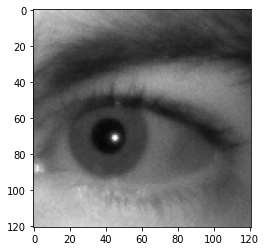

In [3]:
# lets read any of the image 
import matplotlib.pyplot as plt
img_array= cv2.imread('/content/train/Open_Eyes/s0014_07444_0_0_1_2_1_02.png')

plt.imshow(img_array)

In [4]:
img_array.shape         # original shape of the image

(121, 121, 3)

In [5]:
DIRECTORY = "/content/train"
CATEGORIES = ["Closed_Eyes", "Open_Eyes"]


In [6]:
# grab the list of images from our dataset directory, then initialize
# the list of data (i.e., images) and class images

from tensorflow.keras.preprocessing.image import img_to_array
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

In [7]:
len(data), len(labels)

(4000, 4000)

In [8]:
data[0]

array([[[-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        ...,
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978]],

       [[-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        ...,
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978]],

       [[-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        [-0.04313725, -0.04313725, -0.04313725],
        ...,
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978],
        [-0.47450978, -0.47450978, -0.47450978]],

       ...,

       [[-0.42745095, -0.42745095, -0.42745095],
        [-0

In [9]:
data = np.array(data).reshape(-1, 224, 224, 3)           # lets keep the img_size as 224

In [10]:
data.shape

(4000, 224, 224, 3)

In [11]:
labels[:5]

['Closed_Eyes', 'Closed_Eyes', 'Closed_Eyes', 'Closed_Eyes', 'Closed_Eyes']

In [12]:
# labels are categorical values, lets convert them to numbers using Label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
labels= le.fit_transform(labels)

In [13]:
labels                   # closed eyes=0, open eyes=1

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# i have features in data and labels in labels. so will assign them to X and Y for easy understanding
X= data
Y= labels               # will convert labels to array format

In [15]:
Y[3500:3505]

array([1, 1, 1, 1, 1])

In [16]:
# Now lets split our X, Y to training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state= 500 )

In [17]:
len(x_train), len(x_test)

(3200, 800)

# Now lets start with model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Download Mobilenet Model¶
Since i am using transfer learning to get appropriate result, i download the pre-trained mobilenet model.

In [19]:
# Since this is pretrained MobileNet model, will consider it as a base model

base_model = tf.keras.applications.mobilenet.MobileNet()         # this im executing for the second time so its not showing the o/p for the download

17225924/17225924 [==============================] - 1s 0us/step


In [20]:
# lets see how the pretrained model looks like 
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [21]:
# lets see hoow many layers does this base model(pretrained mobilnet model) has
len(base_model.layers)                    # it has 91 layers

91

In [22]:
# since im using pretrained model, will consider this as a base model

base_input= base_model.layers[0].input
base_output= base_model.layers[-4].output

In [23]:
# before sending to dense layer I'll flatten the base_output

flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [24]:
final_model= keras.Model(inputs= base_input, outputs= final_output)


In [25]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [26]:

final_model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [27]:
final_model.fit(x_train, y_train, epochs=1)

100/100 [==============================] - 620s 6s/step - loss: 0.0137 - accuracy: 0.9928


In [28]:
final_model.evaluate(x_test, y_test)     # evaluating test set

25/25 [==============================] - 27s 1s/step - loss: 5.4010e-04 - accuracy: 1.0000


[0.0005400966620072722, 1.0]

# Prediction

In [29]:
y_pred= final_model.predict(x_test)

25/25 [==============================] - 27s 1s/step


In [30]:
y_pred[10:20]

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.7160235e-18],
       [3.5895709e-18],
       [1.1562342e-15],
       [1.0000000e+00],
       [1.4483846e-23],
       [2.7859991e-19],
       [9.2500663e-18]], dtype=float32)

In [31]:
y_test[10:20]                          # comparing the actual value with predicted value. We get correct o/p 

# As the value ranges from 0 to 1, the eye is detected as closed, then the value will be nearer to zero. 
# And if the eye is detected as open then it will be near to 1.

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# Model accuracy

In [32]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

print('Accuracy score: {:0.2}'.format(accuracy_score(y_test, 1 * (y_pred > 0.2))))
print('F1 score: {:0.2}'.format(f1_score(y_test, 1 * (y_pred > 0.2))))
print('AUC-ROC score: {:0.2}'.format(roc_auc_score(y_test, y_pred)))

Accuracy score: 1.0
F1 score: 1.0
AUC-ROC score: 1.0


# Conclusion- Our model accuracy, test accuracy and predicted accuracy score is 100% 

# We are done with model training. Now we need to deploy(host) this on to the web. 
1. we need to save the model
2. we need to laod the model 
3. we need to create the web app
4. lastly need to host the model on web

In [33]:
#  save the model
tf.keras.models.save_model(final_model, 'my_model2.hdf5')

In [34]:
!pip install streamlit -q                # already intstalled

     |████████████████████████████████| 9.2 MB 13.7 MB/s 
     |████████████████████████████████| 182 kB 52.5 MB/s 
     |████████████████████████████████| 164 kB 50.3 MB/s 
     |████████████████████████████████| 78 kB 5.7 MB/s 
     |████████████████████████████████| 4.7 MB 63.2 MB/s 
     |████████████████████████████████| 237 kB 60.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 


In [35]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# whenever we load the image st gives a warning, this line of code will ignore that warning. for some reason im getting error so not running this line
# st.set_option('dreprecation.showfileUploaderEncoding', False)        

@st.cache(allow_output_mutation= True)                  # in case we make any changes and reload the model and run it again then it takes more time. So if there is cache then it will load quickly as it was already loaded previously

# Load the model .. 

def load_model(): 
  model= tf.keras.models.load_model('/content/my_model2.hdf5')         # give the path of the saved model. this function will load the model and return it
  return model
model= load_model()                        

# this is to give heading on the web
st.write("""
         # Drowsiness Detection System                                      
         """)  

file= st.file_uploader("Please upload the image of your eyes for detection", type=['jpg', 'png'])    # here the file will ask user to upload the image

# import libraries required 
import cv2
from PIL import Image, ImageOps                          # this is a python librarary which allows to do lot of computations on images
from tensorflow.keras.utils import load_img
import numpy as np
import tensorflow as tf

def import_and_predict(image_data, model):
  size= (224, 224)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img = preprocess_input(img)
  img_reshape= img[np.newaxis, ...]                     # here we reshape it to 4 axis coz there are too many images trained 
  prediction= model.predict(img_reshape)

  return prediction 


if file is None: 
  st.text("Please upload an image file")
else: 
  image= Image.open(file)
  st.image(image, use_column_width= True)
  predictions= import_and_predict(image, model)
  class_names= ['Closed_Eyes', 'Open_Eyes'] 
  string= "This image most likely is: " +class_names[np.argmax(predictions)]
  st.success(string)





Writing app.py


# till the above we created a web app. Now we need to host this on the internet
# here we are going to use an application called ngrok. (get the authID from ngrk after creating an account)

In [36]:
#install pyngrok to work with ngrok

!pip install pyngrok                  # This is already installed in my base python 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 12.9 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=b883924835172e721419b76772585c316881258ff41db95c7bb2ed8f79bd928b
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [37]:
# check the port where streamlit has hosted this model
# app.run_server(mode= 'external')

In [38]:
# import ngrok 
#  ngrok.set_auth_token("2FGQjNOwIF41AhXQcuHHIzb0vxq_bmd5vBD5cfsfFbniNcNC")   ==> another way of using authtoken 

from pyngrok import ngrok

!ngrok authtoken 2FGQjNOwIF41AhXQcuHHIzb0vxq_bmd5vBD5cfsfFbniNcNC
          
 # this is ur athentication token from ngrok site 


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [39]:
# run the streamlit file. 'nohup' add the o/p to a different file

!nohup streamlit run app.py &           # '&' represents that this line fo code will be running at the background



nohup: appending output to 'nohup.out'


In [40]:
# import the ngrok and connect it to the loacl server from where ngrok can take ur model and host that on the web
# streamlit bydefault host the local web server on 8501 port 
from pyngrok import ngrok
url= ngrok.connect(port=8501)
url                 

# this will genearte our url where the model is hosted


<NgrokTunnel: "http://34ad-34-91-203-231.ngrok.io" -> "http://localhost:80">

In [41]:
# !streamlit run --server.port 8501 app.py                # used for starting our server

In [42]:
# incase u want to again connect the ngrok to port and if u get error then kill ngrok and run that line again. run this command to kill  
# ngrok allows only once, then it gives error, in that case you can kill ngrok and again run url=

# ngrok.kill()

# from pyngrok import ngrok 

# tunnels= ngrok.get_tunnels()
# tunnels




In [47]:
# you can see output stored in nohup. Here you can see if there is any error 

# !cat /content/nohup.out 




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.91.203.231:8501



In [49]:
!streamlit run app.py & npx localtunnel --port 8501

# getting some error here and not finding the url so runnig this command to see how my model looks on web. 
# click on your url and continue on next page to see ur model.

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8502
  External URL: http://34.91.203.231:8502

npx: installed 22 in 5.26s
your url is: https://itchy-apples-decide-34-91-203-231.loca.lt
  Stopping...
^C


In [45]:
# checking the config file of streamlit to solve one fo the error
# !streamlit config show

In [46]:
# !streamlit run app.py --browser.gatherUsageStats False